# Pre-processing

In [2]:
from kiva_data import KivaData
df = KivaData(use_sample=True).loan_data


df.describe()

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,9799.000000,10000.000000,10000.00000
mean,4999.50000,336241.032300,9.939046e+05,777.205500,827.697500,178.780794,13.817300,20.58650
std,2886.89568,194016.646357,1.968474e+05,1045.109963,1085.719941,95.018000,8.849901,26.54376
min,0.00000,7.000000,6.530780e+05,0.000000,25.000000,9.000000,2.000000,0.00000
25%,2499.75000,167926.500000,8.234395e+05,250.000000,275.000000,126.000000,8.000000,7.00000
50%,4999.50000,338895.500000,9.957810e+05,450.000000,500.000000,145.000000,13.000000,13.00000
75%,7499.25000,502303.000000,1.162591e+06,900.000000,1000.000000,204.000000,14.000000,25.00000
max,9999.00000,671142.000000,1.339765e+06,35000.000000,35000.000000,533.000000,144.000000,1067.00000


In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender
0,6883,264956,912251,575.0,975.0,Grocery Store,Food,"to buy more products such as meats, sausages, ...",HN,Honduras,...,2015-07-02 16:54:00,2015-06-12 07:00:00,NaT,20.0,19,"user_favorite, #Single, #Supporting Family",male,monthly,2015-07-02,male
1,2531,541293,1201897,1000.0,1000.0,General Store,Retail,"to buy rice, sugar, oil, detergent, and other ...",EC,Ecuador,...,2016-12-10 19:30:21,2016-11-24 08:00:00,2016-12-21 18:34:41,8.0,26,NaN,female,irregular,2016-12-10,female
2,5531,51283,703673,275.0,1275.0,Shoe Sales,Retail,to buy shoes.,TG,Togo,...,2014-04-28 15:10:26,2014-04-25 07:00:00,NaT,14.0,10,"#Repeat Borrower, #Supporting Family, #Tourism",male,monthly,2014-04-28,male
3,2007,366592,1013657,1200.0,1200.0,Agriculture,Agriculture,to pay rent for a threshing machine and a grin...,SV,El Salvador,...,2016-01-25 20:38:35,2016-01-11 08:00:00,2016-02-25 21:34:35,20.0,37,"#Parent, #Job Creator",male,monthly,2016-01-25,male
4,474,231058,878708,650.0,650.0,Higher education costs,Education,to pay higher education costs.,TJ,Tajikistan,...,2015-04-30 11:42:25,2015-04-24 07:00:00,2015-05-06 12:43:05,14.0,25,"#Schooling, #Female Education, #Single, user_f...",female,monthly,2015-04-30,female


In [4]:
len(df['borrower_genders'].unique())

411

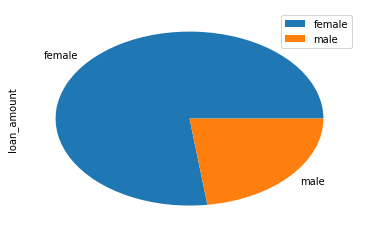

In [5]:
import matplotlib.pyplot as plt
df.groupby('gender').agg('count')[['loan_amount']].plot.pie(y='loan_amount')
plt.show()

In [6]:
type(df['date'])

pandas.core.series.Series

In [7]:
from datetime import datetime
import pandas as pd

df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month

df

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender,year,month
0,6883,264956,912251,575.0,975.0,Grocery Store,Food,"to buy more products such as meats, sausages, ...",HN,Honduras,...,NaT,20.0,19,"user_favorite, #Single, #Supporting Family",male,monthly,2015-07-02,male,2015,7
1,2531,541293,1201897,1000.0,1000.0,General Store,Retail,"to buy rice, sugar, oil, detergent, and other ...",EC,Ecuador,...,2016-12-21 18:34:41,8.0,26,NaN,female,irregular,2016-12-10,female,2016,12
2,5531,51283,703673,275.0,1275.0,Shoe Sales,Retail,to buy shoes.,TG,Togo,...,NaT,14.0,10,"#Repeat Borrower, #Supporting Family, #Tourism",male,monthly,2014-04-28,male,2014,4
3,2007,366592,1013657,1200.0,1200.0,Agriculture,Agriculture,to pay rent for a threshing machine and a grin...,SV,El Salvador,...,2016-02-25 21:34:35,20.0,37,"#Parent, #Job Creator",male,monthly,2016-01-25,male,2016,1
4,474,231058,878708,650.0,650.0,Higher education costs,Education,to pay higher education costs.,TJ,Tajikistan,...,2015-05-06 12:43:05,14.0,25,"#Schooling, #Female Education, #Single, user_f...",female,monthly,2015-04-30,female,2015,4
5,74,667232,1330814,1100.0,1100.0,Phone Accessories,Retail,to purchase phone accessories and remote contr...,EC,Ecuador,...,2017-07-05 15:29:40,9.0,24,"#Repeat Borrower, #Technology",female,irregular,2017-06-30,female,2017,6
6,8945,287122,933715,3825.0,3825.0,General Store,Retail,"to buy drinks, canned goods, dry grains and ot...",PY,Paraguay,...,2015-08-23 18:20:40,6.0,28,NaN,"female, female, female, female, female, female...",irregular,2015-08-18,female,2015,8
7,1291,357507,1004673,300.0,300.0,General Store,Retail,"to buy soda, sugar, soap, and cooking oil for ...",UG,Uganda,...,2016-01-09 21:21:03,8.0,10,"#Woman Owned Biz, #Parent",female,monthly,2016-01-06,female,2016,1
8,9302,402153,1049223,800.0,800.0,Personal Housing Expenses,Housing,to buy metal sheeting and purlins and pay for ...,SV,El Salvador,...,2016-04-22 19:03:21,27.0,22,"#Elderly, #Repeat Borrower, #Woman Owned Biz, ...",female,monthly,2016-04-04,female,2016,4
9,548,292159,939222,325.0,325.0,Motorcycle Transport,Transportation,to pay for the maintenance of their side car u...,PH,Philippines,...,2015-08-29 22:47:27,5.0,12,NaN,female,irregular,2015-08-27,female,2015,8


In [8]:
#dt.df['date'].strftime('%Y-%m')
#chdt = df['date']
#chdt.strftime('%Y-%m')
#dt.date().strftime('%Y-%m')
df['mnth_yr'] = df['date'].apply(lambda x: x.strftime('%B-%Y'))    
#df['mnth_yr']
df.head()

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender,year,month,mnth_yr
0,6883,264956,912251,575.0,975.0,Grocery Store,Food,"to buy more products such as meats, sausages, ...",HN,Honduras,...,20.0,19,"user_favorite, #Single, #Supporting Family",male,monthly,2015-07-02,male,2015,7,July-2015
1,2531,541293,1201897,1000.0,1000.0,General Store,Retail,"to buy rice, sugar, oil, detergent, and other ...",EC,Ecuador,...,8.0,26,NaN,female,irregular,2016-12-10,female,2016,12,December-2016
2,5531,51283,703673,275.0,1275.0,Shoe Sales,Retail,to buy shoes.,TG,Togo,...,14.0,10,"#Repeat Borrower, #Supporting Family, #Tourism",male,monthly,2014-04-28,male,2014,4,April-2014
3,2007,366592,1013657,1200.0,1200.0,Agriculture,Agriculture,to pay rent for a threshing machine and a grin...,SV,El Salvador,...,20.0,37,"#Parent, #Job Creator",male,monthly,2016-01-25,male,2016,1,January-2016
4,474,231058,878708,650.0,650.0,Higher education costs,Education,to pay higher education costs.,TJ,Tajikistan,...,14.0,25,"#Schooling, #Female Education, #Single, user_f...",female,monthly,2015-04-30,female,2015,4,April-2015


In [9]:
#df['mnth_yr2'] = df['date'].apply(lambda x: x.strftime('%m-%Y'))   
df['mnth_yr2'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))    
#df['mnth_yr']
df.head()

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,lender_count,tags,borrower_genders,repayment_interval,date,gender,year,month,mnth_yr,mnth_yr2
0,6883,264956,912251,575.0,975.0,Grocery Store,Food,"to buy more products such as meats, sausages, ...",HN,Honduras,...,19,"user_favorite, #Single, #Supporting Family",male,monthly,2015-07-02,male,2015,7,July-2015,2015-07
1,2531,541293,1201897,1000.0,1000.0,General Store,Retail,"to buy rice, sugar, oil, detergent, and other ...",EC,Ecuador,...,26,NaN,female,irregular,2016-12-10,female,2016,12,December-2016,2016-12
2,5531,51283,703673,275.0,1275.0,Shoe Sales,Retail,to buy shoes.,TG,Togo,...,10,"#Repeat Borrower, #Supporting Family, #Tourism",male,monthly,2014-04-28,male,2014,4,April-2014,2014-04
3,2007,366592,1013657,1200.0,1200.0,Agriculture,Agriculture,to pay rent for a threshing machine and a grin...,SV,El Salvador,...,37,"#Parent, #Job Creator",male,monthly,2016-01-25,male,2016,1,January-2016,2016-01
4,474,231058,878708,650.0,650.0,Higher education costs,Education,to pay higher education costs.,TJ,Tajikistan,...,25,"#Schooling, #Female Education, #Single, user_f...",female,monthly,2015-04-30,female,2015,4,April-2015,2015-04


In [10]:
df.sort_values(by='date', inplace = True)
df.head()

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,lender_count,tags,borrower_genders,repayment_interval,date,gender,year,month,mnth_yr,mnth_yr2
4848,1909,31,653087,400.0,400.0,Manufacturing,Manufacturing,to buy bundles of good quality paper along wit...,PK,Pakistan,...,7,NaN,female,monthly,2014-01-01,female,2014,1,January-2014,2014-01
2268,7583,7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,...,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,female,2014,1,January-2014,2014-01
7247,1411,241,653431,375.0,375.0,Grocery Store,Food,to buy groceries.,PE,Peru,...,1,NaN,female,monthly,2014-01-02,female,2014,1,January-2014,2014-01
2620,3197,157,653408,3400.0,3400.0,Clothing Sales,Clothing,"to buy t-shirts, skirts, shorts and blouses.",PE,Peru,...,60,NaN,"female, female, female, female, female, male",irregular,2014-01-02,female,2014,1,January-2014,2014-01
8064,5457,165,653403,2850.0,2850.0,Poultry,Agriculture,to buy chickens.,GT,Guatemala,...,97,"volunteer_pick, user_favorite","female, female, female, female, female, female...",monthly,2014-01-02,female,2014,1,January-2014,2014-01


In [11]:
#df['date']
#df['date'].dt.year) + df['date'].dt.month

#Tried:
#print(pd.to_datetime(df['date'],format="%y"))


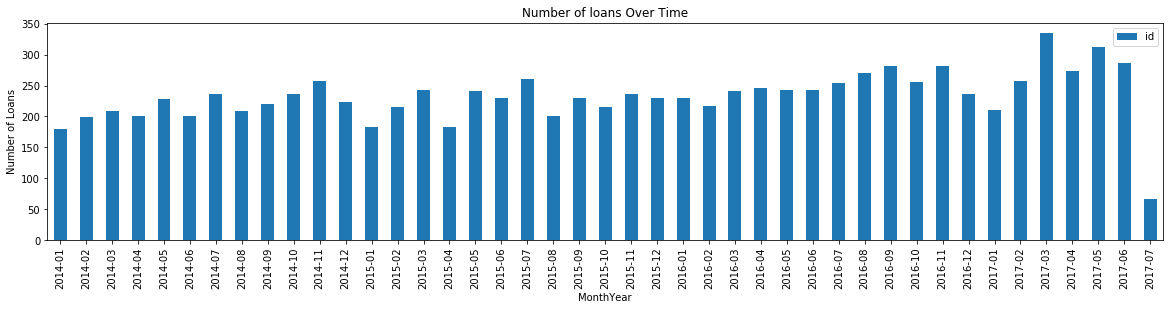

In [12]:
#Number of loans per year.
#df.groupby('mnth_yr2').agg('count')[['id']].plot.bar(y='id')
#'year'
df.groupby('mnth_yr2').agg('count')[['id']].plot.bar(y='id', figsize=(20,4))
plt.title('Number of loans Over Time')
plt.ylabel("Number of Loans")
plt.xlabel("MonthYear")
#plt.savefig('numloans.png')
#df.plot(figsize=(20,4))

plt.show()

In [13]:
medloan = df.groupby('mnth_yr2').agg('median')[['loan_amount']]
medloan.head()

,loan_amount
mnth_yr2,
2014-01,475.0
2014-02,500.0
2014-03,600.0
2014-04,587.5
2014-05,500.0


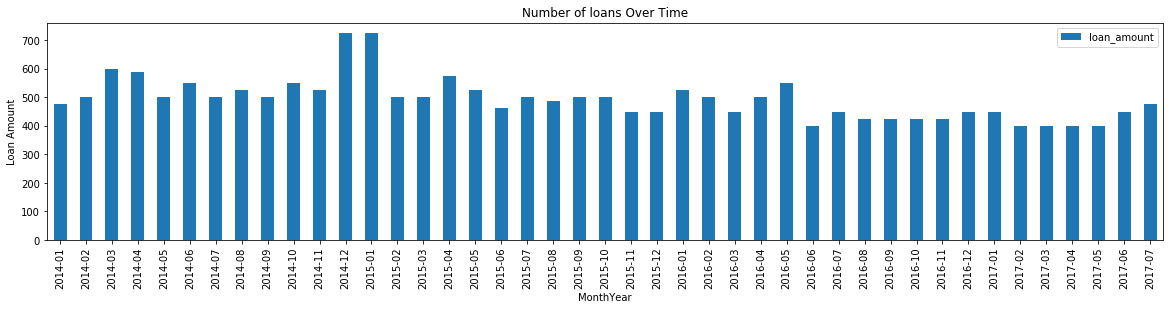

In [14]:
medloan.plot.bar(y='loan_amount', figsize=(20,4))
plt.title('Number of loans Over Time')
plt.ylabel("Loan Amount")
plt.xlabel("MonthYear")
#plt.savefig('numloans.png')
#df.plot(figsize=(20,4))

plt.show()

In [15]:
genderdf = df.groupby(['mnth_yr2', 'gender']).agg('count')[['id']]
genderdf.head()
#plot.bar(y='id', figsize=(20,4))

id
mnth_yr2 gender     
2014-01  female  133
         male     44
2014-02  female  159
         male     40
2014-03  female  162

In [18]:
#ts_df = df.groupby(['Qtr', 'sector'])['id'].count().reset_index()
#funded_amount
# import seaborn as sns
# plt.figure(figsize=(20,10))
# sns.pointplot(
#     x='Qtr',
#     y='id',
#     hue='sector',
#     alpha = 0.8,
#     data=genderdf)
# plt.show()

In [19]:
genderdf

id
mnth_yr2 gender     
2014-01  female  133
         male     44
2014-02  female  159
         male     40
2014-03  female  162
         male     40
2014-04  female  143
         male     51
2014-05  female  183
         male     41
2014-06  female  158
         male     40
2014-07  female  178
         male     51
2014-08  female  138
         male     69
2014-09  female  153
         male     64
2014-10  female  172
         male     62
2014-11  female  187
         male     64
2014-12  female  165
         male     55
2015-01  female  141
         male     41
2015-02  female  156
         male     55
2015-03  female  174
         male     66
...              ...
2016-05  female  175
         male     68
2016-06  female  190
         male     53
2016-07  female  199
         male     55
2016-08  female  211
         male     59
2016-09  female  210
         male     71
2016-10  female  206
         male     49
2016-11  female  214
         male     67
2016-12  female  201
         male     36
2017-01  female  157
         male     54
2017-02  female  206
         male     50
2017-03  female  273
         male     62
2017-04  female  227
         male     46
2017-05  female  253
         male     59
2017-06  female  222
         male     64
2017-07  female   50
         male     16

[86 rows x 1 columns]

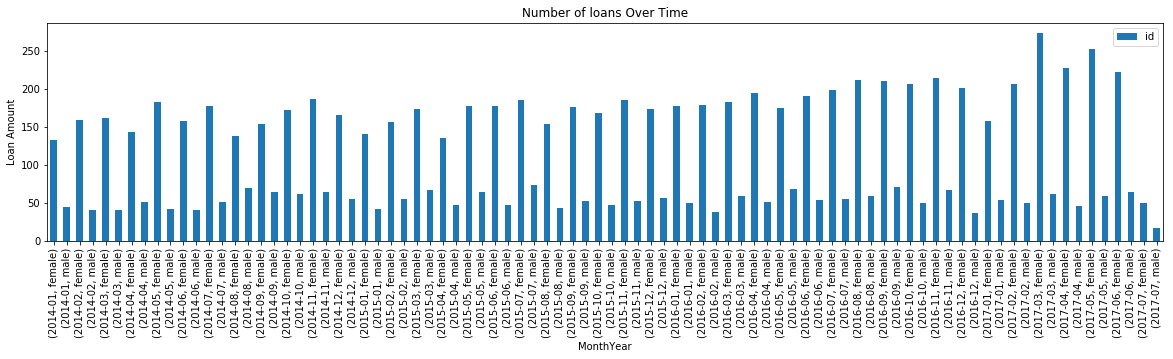

In [20]:
genderdf.plot.bar(y='id', figsize=(20,4))
plt.title('Number of loans Over Time')
plt.ylabel("Loan Amount")
plt.xlabel("MonthYear")
#plt.savefig('gendertime.png')

plt.show()

In [21]:
sectordf = df.groupby(['mnth_yr2', 'sector']).agg('count')[['id']]
sectordf
#sectordf.reset_index()

id
mnth_yr2 sector            
2014-01  Agriculture     34
         Arts             3
         Clothing         7
         Education       12
         Food            51
         Housing          7
         Manufacturing    4
         Personal Use     3
         Retail          38
         Services        14
         Transportation   6
2014-02  Agriculture     36
         Arts             3
         Clothing         8
         Construction     3
         Education        8
         Food            52
         Health           1
         Housing         11
         Personal Use     4
         Retail          49
         Services        18
         Transportation   5
         Wholesale        1
2014-03  Agriculture     54
         Arts             2
         Clothing        14
         Construction     1
         Education       11
         Food            39
...                      ..
2017-05  Manufacturing    2
         Personal Use    33
         Retail          49
         Services        22
         Transportation   3
2017-06  Agriculture     87
         Arts             8
         Clothing        13
         Construction     3
         Education       10
         Food            67
         Health           1
         Housing         15
         Manufacturing    3
         Personal Use    15
         Retail          45
         Services        13
         Transportation   6
2017-07  Agriculture     15
         Arts             3
         Clothing         5
         Construction     2
         Education        6
         Food             9
         Health           1
         Housing          6
         Personal Use     3
         Retail           8
         Services         5
         Transportation   3

[569 rows x 1 columns]

In [22]:
#Add a column for quarter.
df['Qtr'] = pd.PeriodIndex(pd.to_datetime(df.mnth_yr2), freq='Q')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,tags,borrower_genders,repayment_interval,date,gender,year,month,mnth_yr,mnth_yr2,Qtr
4848,1909,31,653087,400.0,400.0,Manufacturing,Manufacturing,to buy bundles of good quality paper along wit...,PK,Pakistan,...,NaN,female,monthly,2014-01-01,female,2014,1,January-2014,2014-01,2014Q1
2268,7583,7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,...,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,female,2014,1,January-2014,2014-01,2014Q1
7247,1411,241,653431,375.0,375.0,Grocery Store,Food,to buy groceries.,PE,Peru,...,NaN,female,monthly,2014-01-02,female,2014,1,January-2014,2014-01,2014Q1
2620,3197,157,653408,3400.0,3400.0,Clothing Sales,Clothing,"to buy t-shirts, skirts, shorts and blouses.",PE,Peru,...,NaN,"female, female, female, female, female, male",irregular,2014-01-02,female,2014,1,January-2014,2014-01,2014Q1
8064,5457,165,653403,2850.0,2850.0,Poultry,Agriculture,to buy chickens.,GT,Guatemala,...,"volunteer_pick, user_favorite","female, female, female, female, female, female...",monthly,2014-01-02,female,2014,1,January-2014,2014-01,2014Q1


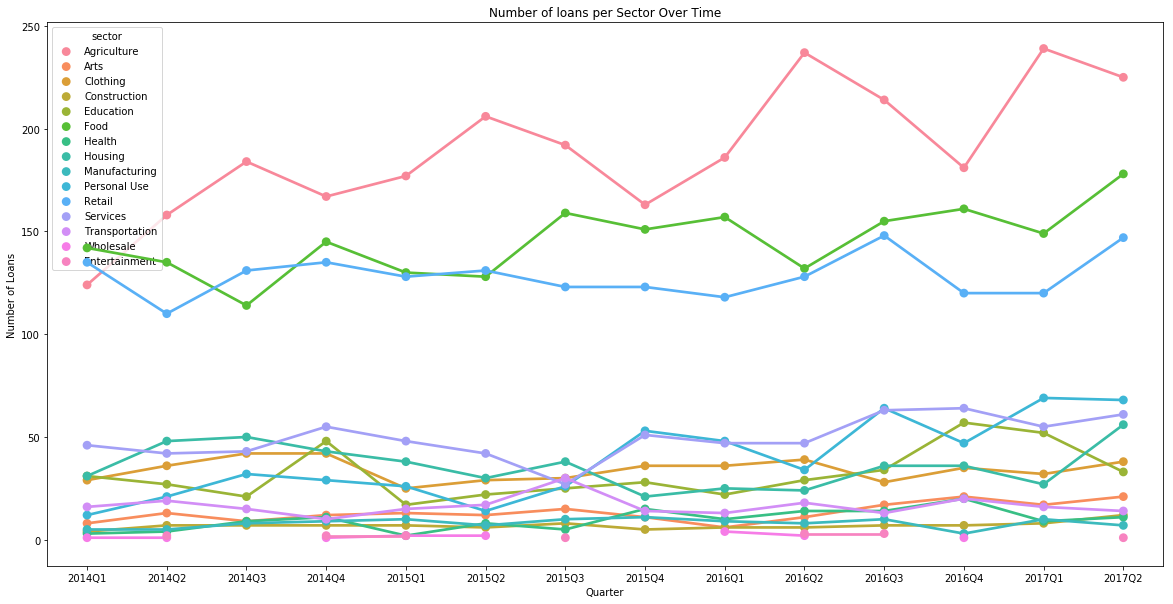

In [39]:
#df.loc[:, 'year_month'] = df['date'].apply(lambda x: x.date().strftime('%Y%m'))
ts_df = df.groupby(['Qtr', 'sector'])['id'].count().reset_index()
ts_df = ts_df[ts_df['Qtr'] < pd.Period('2017Q3')]
#funded_amount
plt.figure(figsize=(20,10))
sns.pointplot(
    x='Qtr',
    y='id',
    hue='sector',
    alpha = 0.8,
    data=ts_df)
plt.title('Number of loans per Sector Over Time')
plt.ylabel('Number of Loans')
plt.xlabel('Quarter')
    
plt.show()

In [29]:
quarter =  pd.to_datetime('20170630',format='%Y%m%d')
quarter

Timestamp('2017-06-30 00:00:00')

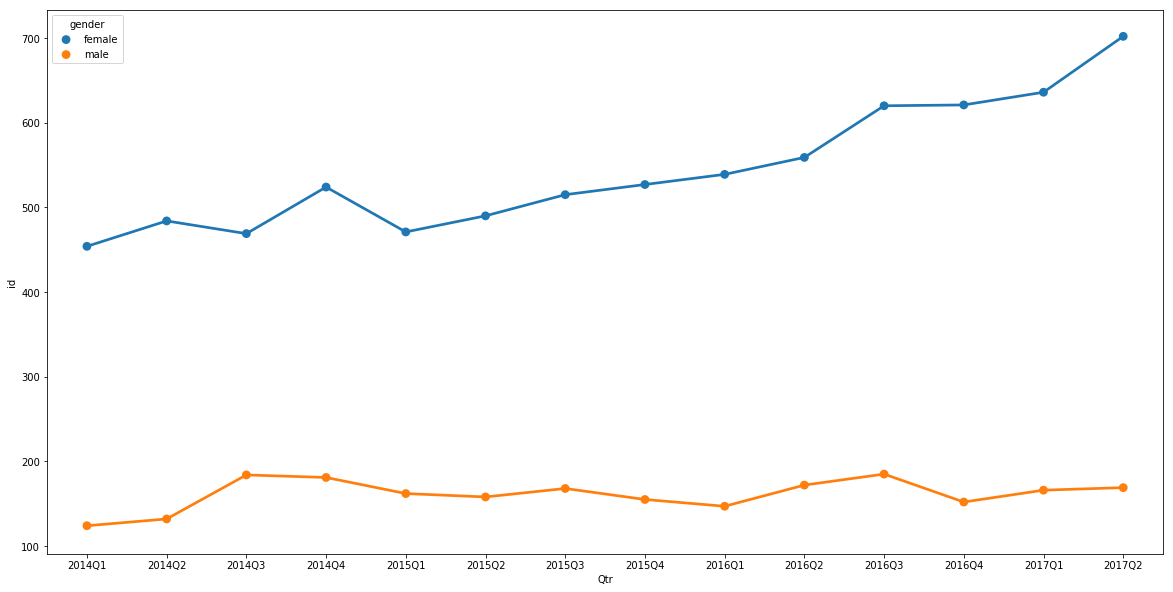

In [32]:
gd_df = df.groupby(['Qtr', 'gender'])['id'].count().reset_index()
gd_df = gd_df[gd_df['Qtr'] < pd.Period('2017Q3')]
plt.figure(figsize=(20,10))
sns.pointplot(
    x='Qtr',
    y='id',
    hue='gender',
    alpha = 0.8,
    data=gd_df)
plt.show()

In [160]:
sectordf.reset_index()
sectordf.head()

id
mnth_yr2 sector         
2014-01  Agriculture  34
         Arts          3
         Clothing      7
         Education    12
         Food         51

In [158]:
pwd

'C:\\Users\\nisha\\Desktop\\Project1'

In [157]:
import seaborn as sns
#sectordf.plot.line(x='mnth_yr2', y='id', hue = 'sector', figsize=(20,4))
#sns.pointplotsectordf.plot.line(x='mnth_yr2', y='id', hue = 'sector', figsize=(20,4))
sns.set_style("darkgrid")
#sns.pointplot(x='mnth_yr2', y='sector', data=sectordf.reset_index())
sns.tsplot(x='mnth_yr2', y='id', hue = 'sector', data=sectordf.reset_index())
#pointplot
#lmplot
# plt.title('Number of loans Over Time')
# plt.ylabel("Loan Amount")
# plt.xlabel("MonthYear")
#plt.savefig('numloans.png')
#df.plot(figsize=(20,4))

plt.show()

C:\Users\nisha\Anaconda\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


ValueError: cannot label index with a null key

In [31]:
df.groupby('gender').agg('count')[['id']]


In [7]:
df.repayment_interval.unique()

array(['monthly', 'irregular', 'bullet', 'weekly'], dtype=object)

In [8]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,9799.000000,10000.000000,10000.00000
mean,4999.50000,336241.032300,9.939046e+05,777.205500,827.697500,178.780794,13.817300,20.58650
std,2886.89568,194016.646357,1.968474e+05,1045.109963,1085.719941,95.018000,8.849901,26.54376
min,0.00000,7.000000,6.530780e+05,0.000000,25.000000,9.000000,2.000000,0.00000
25%,2499.75000,167926.500000,8.234395e+05,250.000000,275.000000,126.000000,8.000000,7.00000
50%,4999.50000,338895.500000,9.957810e+05,450.000000,500.000000,145.000000,13.000000,13.00000
75%,7499.25000,502303.000000,1.162591e+06,900.000000,1000.000000,204.000000,14.000000,25.00000
max,9999.00000,671142.000000,1.339765e+06,35000.000000,35000.000000,533.000000,144.000000,1067.00000


In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'funded_amount', 'loan_amount',
       'activity', 'sector', 'use', 'country_code', 'country', 'region',
       'currency', 'partner_id', 'posted_time', 'disbursed_time',
       'funded_time', 'term_in_months', 'lender_count', 'tags',
       'borrower_genders', 'repayment_interval', 'date', 'gender'],
      dtype='object')

In [10]:
df[['activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time','tags', 'borrower_genders', 'repayment_interval',
       'date', 'gender']].agg(['min', 'max', 'count', lambda x: len(x.unique())])

,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date,gender
<lambda>,151,15,8537.0,77,77,2161.0,62,239.0,9998,1336,9240,3200.0,411.0,4,1226,3.0
count,10000,10000,9931.0,10000,10000,9153.0,10000,9799.0,10000,9971,9286,7472.0,9932.0,10000,10000,9932.0
max,Wholesale,Wholesale,NaN,ZW,Zimbabwe,NaN,ZMW,533.0,2017-07-14 06:58:25,2017-09-28 07:00:00,2017-07-16 08:22:36,NaN,NaN,weekly,2017-07-14,NaN
min,Agriculture,Agriculture,NaN,AL,Albania,NaN,ALL,9.0,2014-01-01 11:46:01,2013-12-09 08:00:00,2014-01-01 16:37:28,NaN,NaN,bullet,2014-01-01,NaN


In [11]:
df.gender.value_counts()

female    7661
male      2271
Name: gender, dtype: int64

In [12]:
df.country.unique()

array(['Honduras', 'Ecuador', 'Togo', 'El Salvador', 'Tajikistan',
       'Paraguay', 'Uganda', 'Philippines', 'Egypt', 'Kenya', 'Cambodia',
       'Nicaragua', 'Indonesia', 'Tanzania', 'Bolivia', 'Peru',
       'Palestine', 'Ghana', 'Mexico', 'Armenia', 'Pakistan', 'Georgia',
       'India', 'Haiti', 'The Democratic Republic of the Congo',
       'Colombia', 'Samoa', 'Guatemala', 'Burundi', 'Nigeria', 'Zimbabwe',
       'Senegal', 'Mozambique', 'Kosovo', 'Iraq', 'Rwanda', 'Turkey',
       'Suriname', 'Lebanon', 'Vietnam', 'Kyrgyzstan', 'United States',
       'Liberia', 'Sierra Leone', 'Yemen', 'Myanmar (Burma)',
       "Lao People's Democratic Republic", 'Costa Rica', 'Jordan', 'Mali',
       'Israel', 'Mongolia', 'Timor-Leste', 'Lesotho', 'Burkina Faso',
       'Nepal', 'Azerbaijan', 'Cameroon', 'Zambia', 'Somalia', 'Albania',
       'Ukraine', 'South Africa', 'Madagascar', 'Malawi', 'China',
       'Benin', 'Dominican Republic', 'Solomon Islands', 'Moldova',
       'Panama', 'Brazi

In [13]:
df.country.value_counts()

Philippines                         2350
Kenya                               1136
El Salvador                          596
Cambodia                             531
Pakistan                             397
Colombia                             321
Peru                                 309
Uganda                               284
Tajikistan                           283
Ecuador                              205
India                                188
Paraguay                             176
Vietnam                              169
Nicaragua                            166
Nigeria                              154
Bolivia                              154
Armenia                              124
Palestine                            121
Lebanon                              115
Samoa                                108
Guatemala                            106
Indonesia                            104
Mali                                  95
Mexico                                93
United States   

In [40]:
pwd

'C:\\Users\\nisha\\Desktop\\Project1'